In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [59]:
X,y,c = make_blobs(500, centers=4, cluster_std=0.8, n_features=2, return_centers=True)

In [60]:
df_blobs = pd.DataFrame({
    "x1" : X[:,0],
    "x2" : X[:,1],
    "y"  : y
})

In [61]:
df_centers = pd.DataFrame({
    "x1" : c[:,0],
    "x2" : c[:,1],
})

In [62]:
df_blobs

,x1,x2,y
0,3.348692,-3.173364,0
1,3.871681,10.101407,1
2,2.106142,-1.513709,0
3,2.538866,-1.853441,0
4,8.406385,-5.976005,3
...,...,...,...
495,4.394897,-2.643770,0
496,3.960371,-2.508447,0
497,6.652474,-5.743327,3
498,2.434585,-1.687501,0


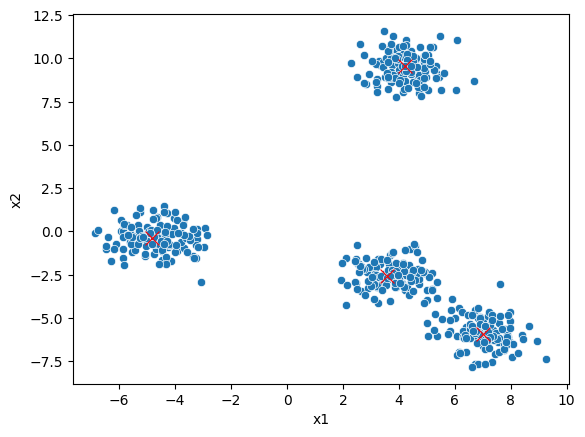

In [63]:
sns.scatterplot(data=df_blobs, x="x1", y="x2")
sns.scatterplot(data=df_centers, x="x1", y="x2", color="red", s=100, marker="x")
plt.show()

In [64]:
kmeans = KMeans(n_clusters=4)

In [65]:
df_cluster = kmeans.fit_predict(X)
df_blobs["cluster"] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_centers = pd.DataFrame({
    "x1" : k_means_centers[:,0],
    "x2" : k_means_centers[:,1],
})

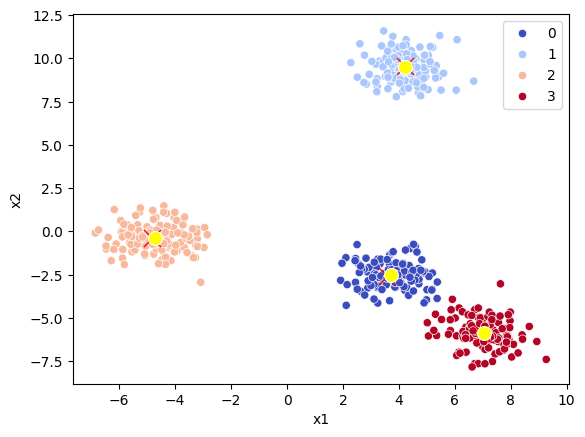

In [66]:
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster", palette="coolwarm")
sns.scatterplot(data=df_centers, x="x1", y="x2", color="red", s=150, marker="x")
sns.scatterplot(data=df_k_means_centers, x="x1", y="x2", color="yellow", s=100, marker="o")
plt.show()

In [67]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs["cluster"] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_centers = pd.DataFrame({
        "x1" : k_means_centers[:,0],
        "x2" : k_means_centers[:,1],
    })
    fig = plt.figure(figsize=(9, 9))
    sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster", palette="coolwarm")
    sns.scatterplot(data=df_centers, x="x1", y="x2", color="red", s=150, marker="x")
    sns.scatterplot(data=df_k_means_centers, x="x1", y="x2", color="yellow", s=100, marker="o")
    plt.show()

3


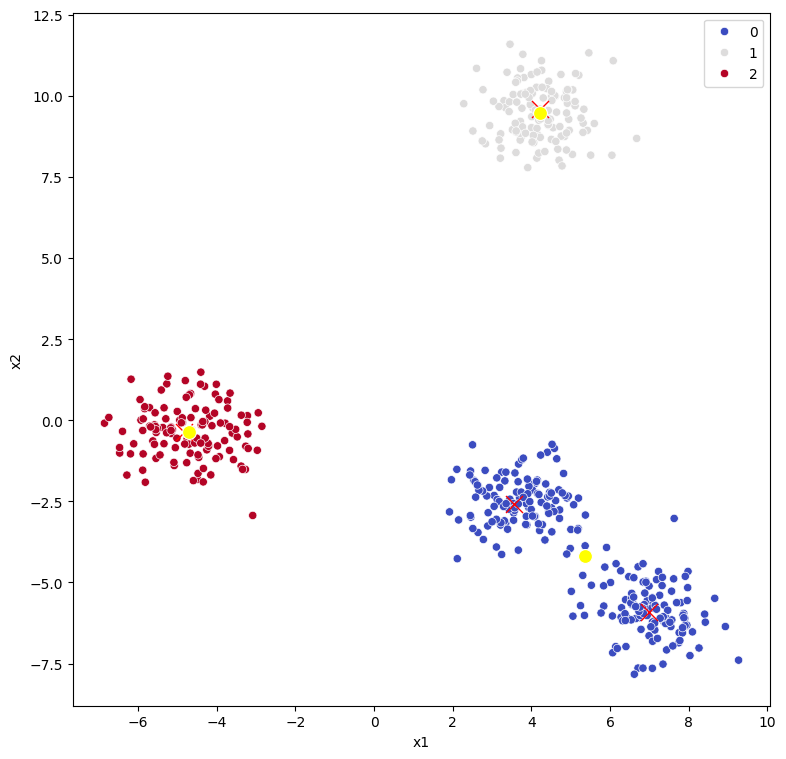

4


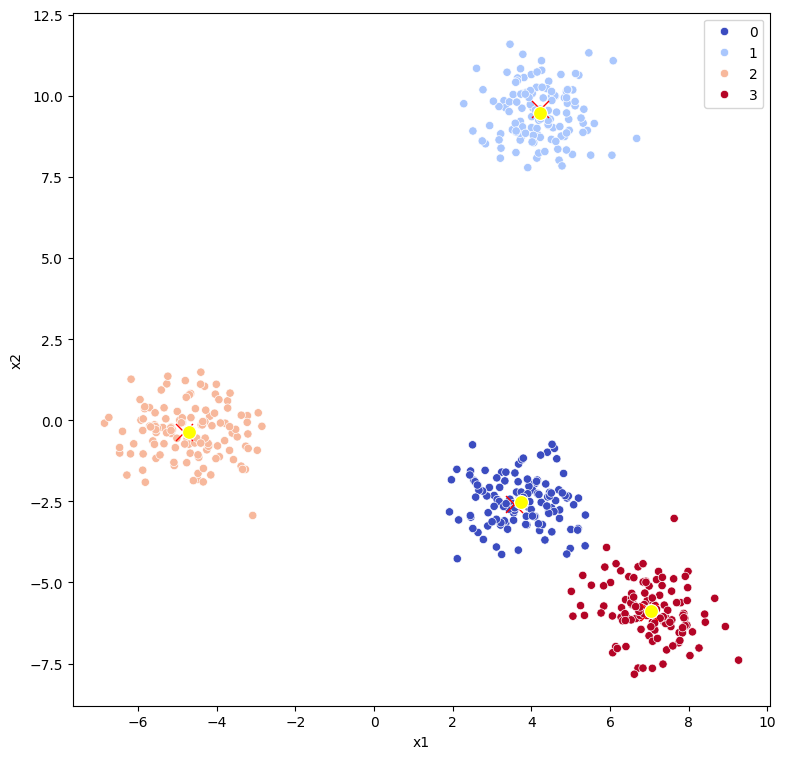

5


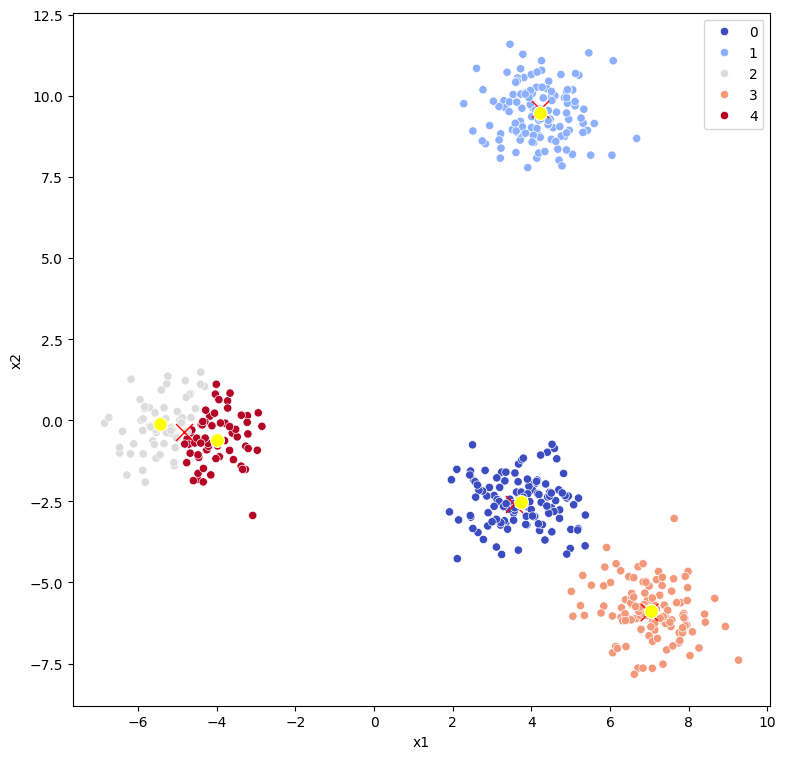

6


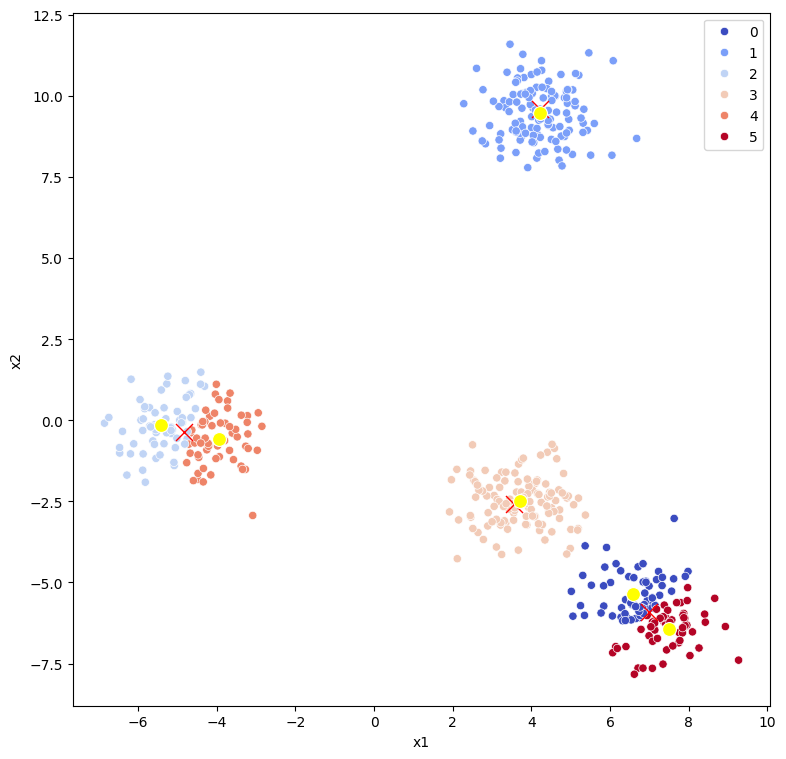

In [68]:
for i in range(3, 7):
    print(i)
    vis_cluster(i)

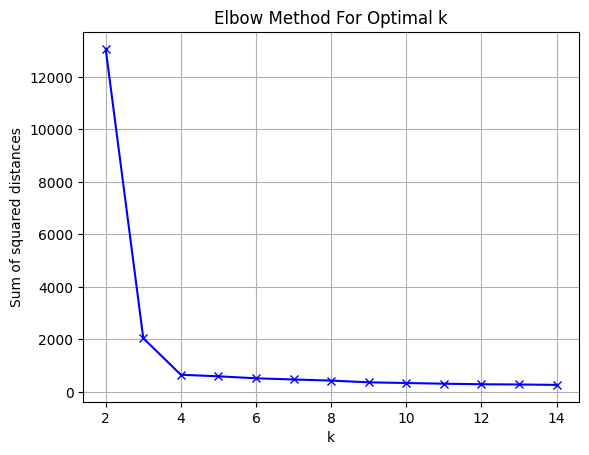

In [69]:
sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

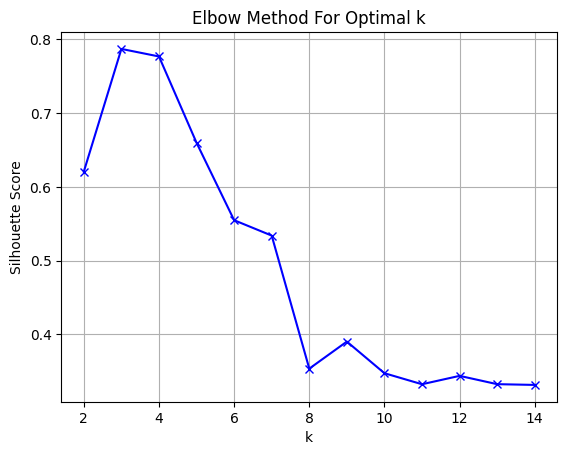

In [70]:
silhouette_scores = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X, y))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()